# DS Lab Activity 1.2. Data Preparation, Querying and Visualisation
_________

In this activity, you will prepare the titanic dataset for further processing in later units.

**Learning Outcomes**
1. be familiar with common data preparation procedures in pandas
1. perform group by and other SQL-like procedures in pandas
1. visualise the data and get insight from your visualisation


To be able to follow this exercise you will need a csv file. This is the data for the passengers who boarded the famous Titanic ship (first and last) journey.

1. Either the file is assumed to be located within the 'data' directory within the same root directory of this notebook. 
2. Or it can be read/downloaded directly from https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv. 
The code is provided for both below (one is commented out)


# Data Preparation

In [1]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML('<style>.container {width: 85% !important}</style>'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading a CSV file

Let us see how we can load the data from a file, particularly from a comma-separated values-csv text file. CSV files are very common data formatting files. Their power lies within their simplicity. In pandas, reading a csv file is done using the read_csv() function.
We will load a titanic.csv file.


In [3]:
titanic = pd.read_csv('datasets/titanic.csv') # use this if you want to retrieve a local copy of the titanic data
#titanic = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv') # use this to retrieve the titanic data online
titanic_org = titanic.copy() # keeping a copy for experimentation

To view the first five or n records of the titanic DataFrame we can use the head() or head(n) function:

In [4]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled,FareRescaled
0,305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0.006071,0.006283,0.295806
1,297,298,0,1,"Allison, Miss Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.013197,0.019854,0.295806
2,386,387,0,3,"Goodwin, Master Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,0.021322,0.007288,0.091543
3,164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,0.025197,0.007288,0.077465
4,183,184,1,2,"Becker, Master Richard F",male,1.00,2,1,230136,39.0000,F4,S,0.025641,0.007288,0.076123


A few words about the dataset: The ‘SibSp’ represents the number of siblings and/or spouses that are on board with the passenger, while the ‘parch’ represents the number of parents and/or children that are on board with the passenger. ‘Embarked’ is the port that the passenger embarked from to the ship. The most important field is 'Survived' which indicates whether a passenger has survived the trip or not. For a classification problem, this is called the label.

In [5]:
titanic.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled,FareRescaled
0,305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0.006071,0.006283,0.295806
1,297,298,0,1,"Allison, Miss Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.013197,0.019854,0.295806
2,386,387,0,3,"Goodwin, Master Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,0.021322,0.007288,0.091543
3,164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,0.025197,0.007288,0.077465
4,183,184,1,2,"Becker, Master Richard F",male,1.00,2,1,230136,39.0000,F4,S,0.025641,0.007288,0.076123
5,827,828,1,2,"Mallet, Master Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,0.027024,0.007288,0.072227
6,78,79,1,2,"Caldwell, Master Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0.028621,0.005152,0.056604
7,469,470,1,3,"Baclini, Miss Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,0.038944,0.004147,0.037590
8,644,645,1,3,"Baclini, Miss Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,0.038944,0.004147,0.037590
9,831,832,1,2,"Richards, Master George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0.044267,0.005152,0.036598


Note that some of the data can be seen to be missing(NaN) from the first 10 records. We can call the describe() function to give a quick statistics about numerical features. This gives a useful information about the mean and standard deviation as well as the min and max and the percentiles in between.

In [6]:
titanic.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FareAgeRatio,AgeRescaled,FareRescaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208,inf,0.368672,0.062858
std,257.353842,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429,NaN,0.163390,0.096995
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.006071,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.715220,0.271174,0.015440
50%,445.000000,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.925134,0.371701,0.028213
75%,667.500000,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.405598,0.434531,0.060508
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,inf,1.000000,1.000000


To describe() categorical attributes we can pass the flag include='object' to describe(). This will give beside the overall count for each attribute, the number of unique values for each categorical attribute and most frequent values and their counts.

In [7]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allison, Master Hudson Trevor",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


The 'count' statistics, can give us a quick indication of missingness across the different attributes. For example, we have 891 records, for the Age attribute we seem to have 891-714 = 177 records *missing* the Age data. Similarly, we have 891-204=687 records missing the Cabin data.

To describe() all attributes, numerical and categorical, we can pass include='all', but that usually gives a NaN-cluttered table due to different relevant statistics for numerical and categorical attributes.

In [8]:
# titanic.describe(include='all')

We can also use isnull() **if** we are sure that missing data is encoded as null values. 

**Important**
In real-world data, sometimes missingness is expressed using different values like '?' or '??' or 'Missing' etc. The data analyst needs to be vigilant on how the data was collected and how missingness was expressed in the records.

In [8]:
pd.isnull(titanic['Age']).sum()

0

We can fill in the missing categorical values with the most frequent attribute if we do not have high missingness rate, similarly, we can fill in the missing numerical values with the mean of the attribute. 

**Note**: We are showing isolated data missingness treatment using simple functionalities in pandas. However, when put within the context of training predictive models, this treatment can cause data leakage if not performed carefully. One common example is when we split the data into training and testing sets. In this case, using the mean of an attribute over the entire dataset causes data leakage (the model is passed information during training that it should not have seen). **The attribute data from the test set must not contribute to the calculation of the mean**. Instead, data missingness treatment must be performed by utilising the training set only (after splitting). The mean of the attribute data in the training set (or the most frequent value if the attribute is categorical) must be used to fill in the missing data in the testing set. This can be done easily using sklearn encoders and transform in conjunction with pipelines, as we shall see later. In particular, we use fit_transform() on the training set and then utilise the transform() on the testing set. See [sklearn common pitfalls article](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage-during-pre-processing) for more details.

In [9]:
pd.Series([1,2,np.nan,3]).mean() # note how pandas does not take the null value into account when calculating the mean which is desirable 

2.0

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   PassengerId   891 non-null    int64  
 2   Survived      891 non-null    int64  
 3   Pclass        891 non-null    int64  
 4   Name          891 non-null    object 
 5   Sex           891 non-null    object 
 6   Age           891 non-null    float64
 7   SibSp         891 non-null    int64  
 8   Parch         891 non-null    int64  
 9   Ticket        891 non-null    object 
 10  Fare          891 non-null    float64
 11  Cabin         204 non-null    object 
 12  Embarked      889 non-null    object 
 13  FareAgeRatio  891 non-null    float64
 14  AgeRescaled   891 non-null    float64
 15  FareRescaled  891 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 111.5+ KB


In [16]:
Age_mean = round(titanic['Age'].mean())
print(Age_mean)
titanic['Age'].fillna(Age_mean, inplace=True)
pd.isnull(titanic['Age']).sum()

30


0

## Selecting Attributes

Let us see how we can select a specific subset of attributes(aka fields, columns, variables) within this DataFrame. 
To do so we simply specify the column names that we want to keep and leave out the fields that we do not want to include.
Note that the attribute are shown when we call the head() function, however if you want to retrieve them programmatically then we can do so using print(titanic.columns).

In [17]:
print(titanic.columns)

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareAgeRatio',
       'AgeRescaled', 'FareRescaled'],
      dtype='object')


In [18]:
titanic_age_sex = titanic[['Age', 'Sex']]
titanic_age_sex.head(15)

,Age,Sex
0,0.92,male
1,2.00,female
2,1.00,male
3,1.00,male
4,1.00,male
5,1.00,male
6,0.83,male
7,0.75,female
8,0.75,female
9,0.83,male


On the other hand, if we want to filter out the 'age' and 'sex' attributes then we can either state all columns except these two. Or it might be easier to use drop()

In [19]:
titanic_no_age_sex = titanic.drop(['Age','Sex'], axis=1)
titanic_no_age_sex.head()


,Unnamed: 0,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled,FareRescaled
0,305,306,1,1,"Allison, Master Hudson Trevor",1,2,113781,151.5500,C22 C26,S,0.006071,0.006283,0.295806
1,297,298,0,1,"Allison, Miss Helen Loraine",1,2,113781,151.5500,C22 C26,S,0.013197,0.019854,0.295806
2,386,387,0,3,"Goodwin, Master Sidney Leonard",5,2,CA 2144,46.9000,NaN,S,0.021322,0.007288,0.091543
3,164,165,0,3,"Panula, Master Eino Viljami",4,1,3101295,39.6875,NaN,S,0.025197,0.007288,0.077465
4,183,184,1,2,"Becker, Master Richard F",2,1,230136,39.0000,F4,S,0.025641,0.007288,0.076123


In [21]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled,FareRescaled
0,305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0.006071,0.006283,0.295806
1,297,298,0,1,"Allison, Miss Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.013197,0.019854,0.295806
2,386,387,0,3,"Goodwin, Master Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,0.021322,0.007288,0.091543
3,164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,0.025197,0.007288,0.077465
4,183,184,1,2,"Becker, Master Richard F",male,1.00,2,1,230136,39.0000,F4,S,0.025641,0.007288,0.076123


Note that pandas return a DataFrame type when we filter by a list of attributes, i.e. titanic[['Age','Sex']] returns a new DataFrame.

In [22]:
type(titanic_age_sex)

pandas.core.frame.DataFrame

## Selecting Records

Now let us obtain a subset of records (above we returned a subset of fields so we filtered vertically), below we filter horizontally, i.e. we obtain a smaller subsets of the available rows in the data frame.

In [23]:
titanic_adults = titanic['Age'] > 25
titanic_adults.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Age, dtype: bool

Note that the operation titanic['Age'] > 25 returned a set of True/False values for each available record.
To utilise this filter we would need to pass this series of Boolean values to the titanic Data Frame again!

This is a common operation, we do the same also for numpy arrays, in fact a lot of the operations that we state here are available for numpy array and possibly motivated by that since pandas and numpy complement each other greatly. We provide a tutorial on numpy and data generation and data visualisation in another exercise.

In [24]:
titanic[titanic['Age'] > 25].head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled,FareRescaled
17,258,259,1,1,"Ward, Miss Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0.068315,0.434531,1.000000
18,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0.068315,0.434531,1.000000
21,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0.070267,0.447097,1.000000
40,377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,0.127660,0.334004,0.412821
42,557,558,0,1,"Robbins, Mr. Victor",male,30.0,0,0,PC 17757,227.5250,NaN,C,0.131854,0.371701,0.444099


Ok, let us check how many records we retrieved from the original titanic DataFrame

In [25]:
titanic.shape , titanic[titanic_adults].shape

((891, 16), (590, 16))

Note that the filter resulted in a smaller set of records.

----------
# Data Querying: Survival Analysis
## GroupBy- one field

Let us see the percentage of people who survived from the tragic accident of the titanic sink. To do so, we can filter according to the 'survived' attribute (which is the class/label), then we use the value_count() function to count the number of people who survived and the one who did not make it.

In [26]:
survived_titanic = titanic[['Survived']].value_counts()
survived_titanic.head()

Survived
0           549
1           342
dtype: int64

In [27]:
survived_titanic[0]

549

We can also visualise using plot in pandas, we will cover this in more details toward the end of this notebook.

<AxesSubplot: xlabel='Survived'>

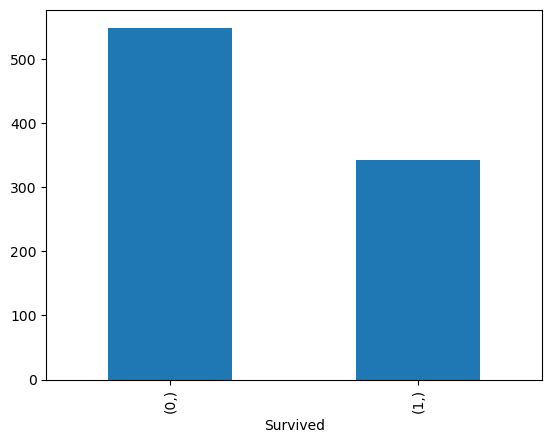

In [22]:
survived_titanic.plot.bar()

Let us see the gender distribution of the number of males and females who boarded the ship

In [23]:
titanic_byGender = titanic[['Sex']].value_counts()
titanic_byGender.head()

Sex   
male      577
female    314
dtype: int64

In [24]:
titanic_byGender[1]

314

To see the percentage of male and females we can pass normalize=True to the value_counts() function and then multiply by 100.

In [25]:
titanic_byGender_perc = titanic[['Sex']].value_counts(normalize=True)*100
titanic_byGender_perc.head()

Sex   
male      64.758698
female    35.241302
dtype: float64

So male count is twice the female count on the ship

If we are interested in the gender distribution of the survivors in the titanic dataset, then we can group records by 'Sex' to see how many males and females made it.

In [26]:
survived_titanic_byGender = titanic[['Sex','Survived']].groupby('Sex').sum()
survived_titanic_byGender.head()

,Survived
Sex,
female,233
male,109


Let us see now the count of male and females who survived and the count of male and female who did survived

In [27]:
titanic_survival = titanic[['Survived', 'Sex']].groupby(['Survived','Sex']).value_counts()
titanic_survival.head()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

To see the *percentage* of male and females who survived and the percentage of male and female who did survived, we can divide by the titanic_byGender and multiply by 100.

In [28]:
titanic_survival_perc = titanic_survival/titanic_byGender*100
titanic_survival_perc.head()

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
dtype: float64

As we can see 81% of males did not survived, while 74% of females survived! 
That shows a great preference of gender and a strong correlation between a specific gender and survival, which indicates that gender would be a strong predictor for survival for this dataset.

To see the age average of male and female

In [29]:
titanic_byGender = titanic_age_sex.groupby(['Sex']).mean()
titanic_byGender.head()

,Age
Sex,
female,28.267516
male,30.570485


Note that the 'Age' attribute has the mean of all female and male ages on the ship and it shows that on average the females were 2.8 years younger than their males counterparts.

## CrossTab Function

A similar results can be obtained using crosstab instead of groupby (titanic[['Survived', 'Sex']].groupby(['Survived','Sex']).value_counts())

Survived    0    1
Sex               
female     81  233
male      468  109


<AxesSubplot: xlabel='Sex'>

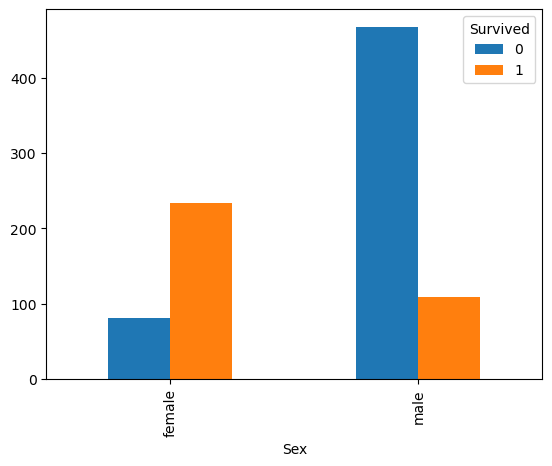

In [30]:
titanic_survival_ = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(titanic_survival_)
titanic_survival_.plot.bar()

## Your turn
Try to see the distribution of Age with Sex and Survival and what you could deduce from them

## GroupBy- multiple fields
Groupby can yield an interesting information and insight about our data. Note that Pandas attempts to compute the mean of numeric columns, but there are some unexpected string or mixed-type data. So, by converting all columns to numeric explicitly and handling invalid entries, the operation proceeds without errors. In addition, dropping non-numeric columns ensures only aggregatable data is passed to the `.groupby()` and `.mean()` methods. The following code cell generate a DataFrame of grouped averages by `Age` and `Fare`, sorted by `Fare` in descending order, and display the first 5 rows.

In [31]:
# Ensure 'Age' and 'Fare' columns are numeric, coercing invalid entries to NaN
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')
titanic['Fare'] = pd.to_numeric(titanic['Fare'], errors='coerce')

# Drop non-numeric or irrelevant columns, then drop rows with NaN in 'Age' or 'Fare'
titanic_cleaned = titanic.drop(['PassengerId', 'Name', 'Sex'], axis=1)
titanic_cleaned = titanic_cleaned.dropna(subset=['Age', 'Fare'])

# Ensure all remaining columns are numeric, coercing non-numeric ones to NaN
for col in titanic_cleaned.columns:
    titanic_cleaned[col] = pd.to_numeric(titanic_cleaned[col], errors='coerce')

# Group by 'Age' and 'Fare', calculate the mean of other numeric columns
titanic_byFare = titanic_cleaned.groupby(['Age', 'Fare']).mean()

# Sort the grouped data by 'Fare' in descending order
titanic_byFare_sorted = titanic_byFare.sort_values(by='Fare', ascending=False)

# Display the first 5 rows of the sorted DataFrame
print(titanic_byFare_sorted.head(5))

               Survived  Pclass  SibSp  Parch   Ticket  Cabin  Embarked
Age  Fare                                                              
35.0 512.3292       1.0     1.0    0.0    0.0      NaN    NaN       NaN
36.0 512.3292       1.0     1.0    0.0    1.0      NaN    NaN       NaN
19.0 263.0000       0.0     1.0    3.0    2.0  19950.0    NaN       NaN
23.0 263.0000       1.0     1.0    3.0    2.0  19950.0    NaN       NaN
24.0 263.0000       1.0     1.0    3.0    2.0  19950.0    NaN       NaN


Note how we cascaded two operations drop and groupby. This is possible since drop returns a dataframe.
Also Note that this gives us the records grouped by both the 'Fare' and the 'Age'.


Ok, let us now filter by 'Age', 'Fare' and 'Sex' and then we groupby and average via the 'Sex' attribute to see socioeconomic distribution of the journey.

In [32]:
titanic_byAgeFare = titanic[['Age','Fare', 'Sex']]
titanic_byAgeFare = titanic_byAgeFare.groupby(['Sex'],sort='ascending').mean().round(1)
titanic_byAgeFare.head()

,Age,Fare
Sex,,
female,28.3,44.5
male,30.6,25.5


The results show that females paid almost £19 more than their males counterparts in general (this is about £2000 in today's money) and on average were 2.8 years younger than their male counterpart.

## Calculating the Ratio of Two Fields

We can calculate a new field based on other fields in the dataset. This can be useful when we want to pre-process the data before passing it to a modelling technique.

To demonstrate how, let us calculate the ratio of the 'Fare' and the 'Age' and assign the result to a new column (field) that we call 'FareAgeRatio' (although this might not make a lot of sense in the context of the Titanic dataset but it shows the concept)

In [33]:
titanic['FareAgeRatio'] = titanic['Age']/titanic['Fare']
titanic.sort_values(by=['FareAgeRatio'], inplace=True, ascending=True)
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio
305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0.006071
297,298,0,1,"Allison, Miss Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.013197
386,387,0,3,"Goodwin, Master Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,0.021322
164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,0.025197
183,184,1,2,"Becker, Master Richard F",male,1.00,2,1,230136,39.0000,F4,S,0.025641
827,828,1,2,"Mallet, Master Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,0.027024
78,79,1,2,"Caldwell, Master Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0.028621
469,470,1,3,"Baclini, Miss Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,0.038944


## Summarising and Rescaling a Field

Sometimes it is useful to rescale the data in order to normalise it to make sure that all entries lie within the unit interval [0,1]. Such property has many benefits and it can guarantee better performance for some models such as the kNN (k Nearest Neigbours) technique discussed in unit 3. Effectively it prevents one attribute from dominating other attributes due to its values being large by nature in comparison to other attributes.

Let us see how we can do this in pandas succinctly for the age.
First let us see how we can get the max and min of the ages on our DataFrame

In [34]:
titanic.Age.max(), titanic.Age.min()

(80.0, 0.42)

To rescale we need to take each age, subtract it from the min and then we divide the result over the max - min

In [35]:
titanic['AgeRescaled'] = (titanic.Age - titanic.Age.min())/(titanic.Age.max()-titanic.Age.min())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled
305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0.006071,0.006283
297,298,0,1,"Allison, Miss Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.013197,0.019854
386,387,0,3,"Goodwin, Master Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,0.021322,0.007288
164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,0.025197,0.007288
183,184,1,2,"Becker, Master Richard F",male,1.00,2,1,230136,39.0000,F4,S,0.025641,0.007288


If we want to select the relevant attributes without creating a new DataFrame we can do so by creating a list of those relevant attributes. This is a better practice because trying to add a newly created attribute to a DataFrame copy will result in a warning. 

In [36]:
relevant = ['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Age', 'AgeRescaled']
titanic[relevant].head()

,Survived,Pclass,Sex,Fare,Embarked,Age,AgeRescaled
305,1,1,male,151.5500,S,0.92,0.006283
297,0,1,female,151.5500,S,2.00,0.019854
386,0,3,male,46.9000,S,1.00,0.007288
164,0,3,male,39.6875,S,1.00,0.007288
183,1,2,male,39.0000,S,1.00,0.007288


In [37]:
# we can create a smaller dataframe
relevant_small = ['Survived', 'Sex', 'Fare', 'Age', 'AgeRescaled']
titanic[relevant_small].head()

,Survived,Sex,Fare,Age,AgeRescaled
305,1,male,151.5500,0.92,0.006283
297,0,female,151.5500,2.00,0.019854
386,0,male,46.9000,1.00,0.007288
164,0,male,39.6875,1.00,0.007288
183,1,male,39.0000,1.00,0.007288


Try to rescale the 'Fare' attribute

In [38]:
titanic['FareRescaled'] = (titanic.Fare - titanic.Fare.min())/(titanic.Fare.max()-titanic.Fare.min())

Let us see how the gender affected the survivals

In [39]:
titanic_byGender = titanic[['Sex','Survived','AgeRescaled','FareRescaled']].groupby(['Sex','Survived']).mean()
titanic_byGender.head()
#titanic_byGender.columns

AgeRescaled  FareRescaled
Sex    Survived                           
female 0            0.322523      0.044941
       1            0.359459      0.101377
male   0            0.387342      0.042865
       1            0.342497      0.079678

**Note**: Although we have used pandas to perform rescaling, sklearn provides a superior operators that can be used to achieve this objective and they should be used instead of pandas. This is because they provide a better integration with other tools like pipelines to help prevent data leakage. See the example at the end of the notebook.

-----
# Data Visualisation: with Pandas


## Simple Command for Plotting in Pandas

There are some built-in capabilities to plot in pandas, however you might find it easier to use ‎matplotlib. Below we show both approaches.

,Age,Fare
Sex,,
female,28.3,44.5
male,30.6,25.5


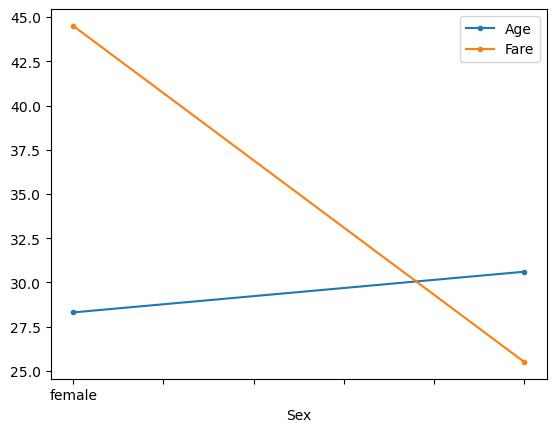

In [40]:
titanic_byAgeFare.plot(marker='.')
titanic_byAgeFare

Note how the 'Fare' and 'Age' varies with gender. This visualization shows that 'Fare' varies more significantly with gender than with age. This visualisation would be better using a bar chart which we show below.

<AxesSubplot: xlabel='Sex'>

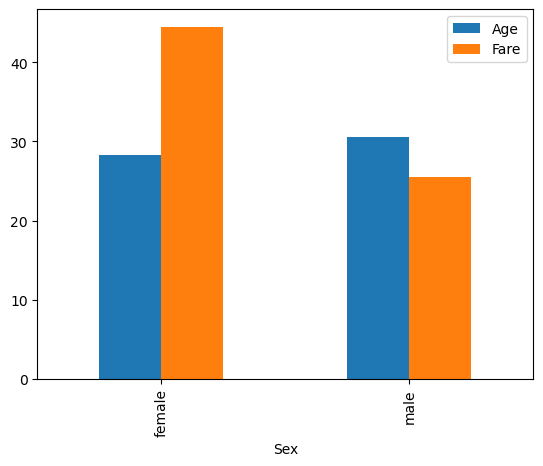

In [41]:
titanic_byAgeFare.plot.bar()

We can use a scatter plot which conveys a different visualisation that shows each point as a dot(bulb). We need to pass to it the fields that we want to visualise against each other. 

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

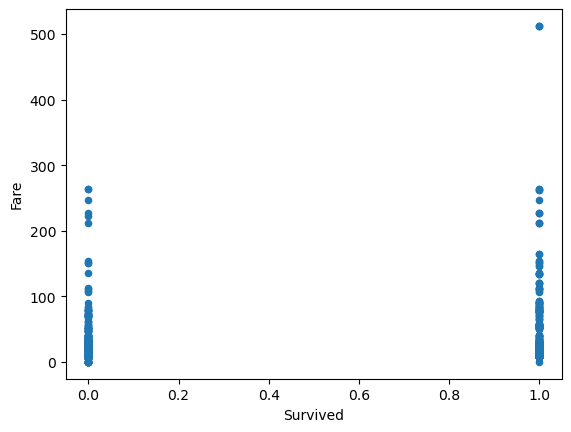

In [42]:
titanic.plot.scatter('Survived', 'Fare')

Note how survival seems not to be affected by the fair for the first £100 then the chances of survival becomes higher for the [100,200] price bracket. Interestingly the [200, 300] bracket seems to have similar chances of survival and not survival(possibly affected by gender). Finally all those who paid extremely high price fare of more than £500 have survived.

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

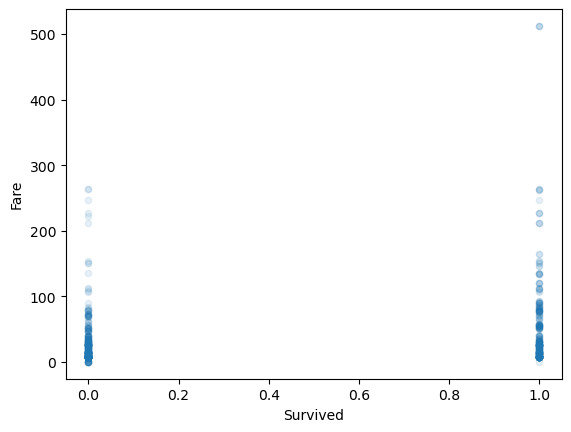

In [43]:
titanic.plot.scatter(x='Survived', y='Fare', alpha= 0.1)

The alpha argument is for how transparent the bubbles are, 1 is not transparent (the default) while 0 is completely transparent (which will not allow you to see anything so do not assign 0 to this parameter).

<AxesSubplot: xlabel='Survived', ylabel='Age'>

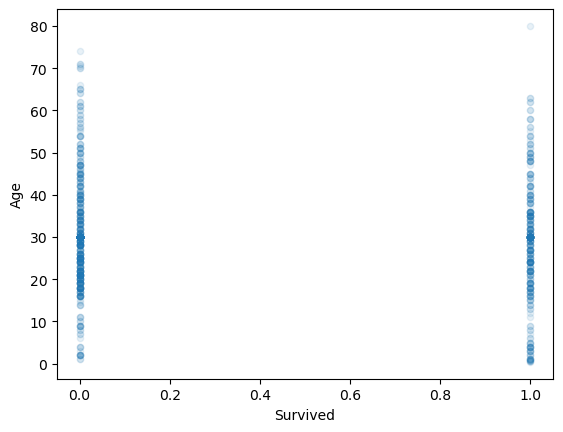

In [44]:
titanic.plot.scatter(x='Survived', y='Age', alpha=0.1)

This shows that the age group above 65 have less survival chances

## Data Visualisation from Different Perspectives

Let us now plot the Age against the Fare and see if there is some correlation with the survival of the passengers 

<AxesSubplot: xlabel='Age', ylabel='Fare'>

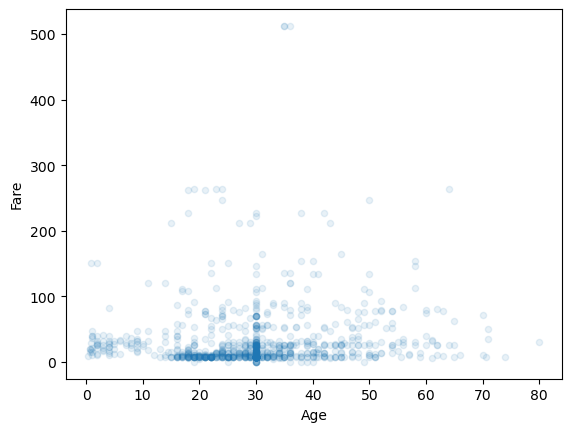

In [45]:
titanic.plot.scatter(x='Age', y='Fare', alpha=0.1)

Let us now plot the label of the data (Survived) against the gender. Note that this label can be used to predict the survival of a passenger in a supervised learning manner. You will learn more about this in the machine learning and data science modules.

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

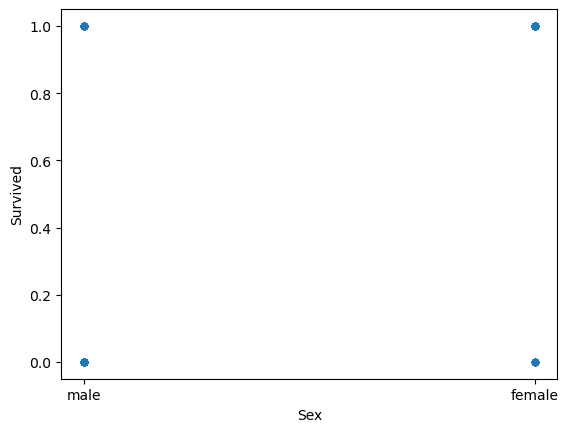

In [46]:
titanic.plot.scatter(x='Sex', y='Survived', alpha=0.1)

This seems to suggest that survival and non-survival occurred in all age and gender groups.

If we plot the gender against the survivals and the 'Fare' in a bubble plot, it becomes clearer that the Fare played a role in the survival of the passenger. At least we can say there is some correlation between them. Note that we have used the Fare to represent the size of each bubble. Note how it is possible to use the plt module (by importing the matplotlib.pyplot library) directly. Note that we have to use titanic DataFrame to refer to any attribute inside it, while we did not have to do that in the above examples, both ways are valid.

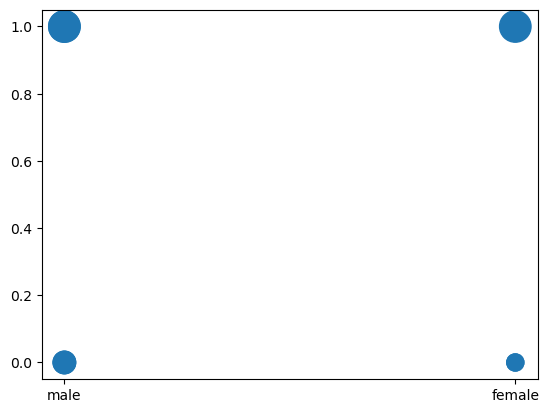

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x=titanic['Sex'], y=titanic['Survived'], s = titanic['Fare'])

Can you find a way to change the transparency and the colour the bubbles in the above example?
Can you find a way to plot the data in last section of Exercise 2?

Let us do the same for Age and Survived to see the effect of Age on survival chances

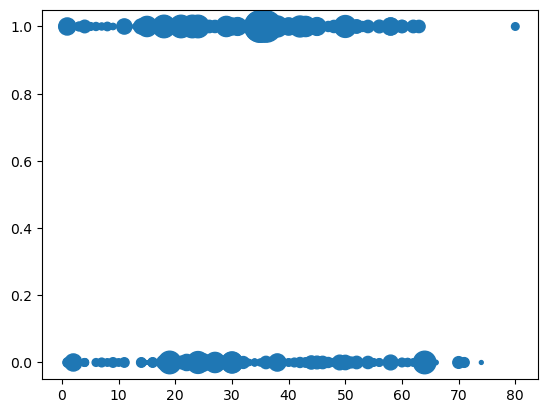

In [48]:
axs = plt.scatter(x=titanic['Age'], y=titanic['Survived'], s = titanic['Fare'])

The figure seems to suggest that people in their 30s had relatively better survival chances than people in their 20s, also people in their 60s had less chances of survival than everyone. Children above 10 years old had relatively better chances than younger age.

### Correlation in pandas
We can also employ correlation analysis from pandas to check for collinearity, as we show below.

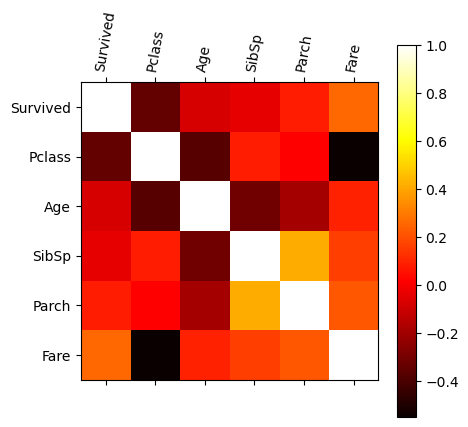

In [49]:
def correlation(X):
    X = X.select_dtypes(include='number') 
    plt.matshow(X.corr(), cmap=plt.get_cmap('hot'))
    plt.colorbar()
    name_rng = np.arange(0,X.columns.size)
    plt.xticks(name_rng, X.columns, rotation=80)
    plt.yticks(name_rng, X.columns)
    plt.show()

correlation(titanic_org.drop(['PassengerId'], axis=1))

As can be seen the 'Survived' class features is correlated more with 'Fare' and is less correlated with Age. Note that it is also negatively correlated to Pcalss, which means the higher the Pclass the less likely that the person will survive. This is because, Pclass is itself inversely correlated with affluence, and social class. For example 1st class has an advantage over and is treated better than 2nd class etc.

# Data Conversion: Converting Categorical into Numerical Data and its Pitfalls

If we would like to convert the gender values into 0 and 1 to be able to manipulate them, then this can be done as follows:

In [50]:
conversion_criteria = {"Sex": {"male": 0, "female": 1}}
titanic_ = titanic.replace(conversion_criteria)
titanic_["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

The conversion can be better achieved by using one-hot-encoding. In pandas, this can be achieved via get_dummies(), while in sklearn it can be equally achieved via OneHotEncoder(). One-hot-encoding creates a feature for each value, similar to pivoting, let us see how.

In [51]:
pd.get_dummies(titanic['Sex'])

,female,male
305,0,1
297,1,0
386,0,1
164,0,1
183,0,1
...,...,...
263,0,1
732,0,1
271,0,1
822,0,1


**Note**: Using one-hot-encoding is preferable over directly replacing nominal values with numerical values because it avoids implicitly assuming an order. Think about it, o is less than 1, so why we need to assume that one nominal value is larger than the other. This is does not make sense, and although this might not appear to be significant for binary attributes, it certainly plays a role implicitly for numerical models.

In general, to apply a numerical technique to a dataset, we encode nominal variables into numerical values. 
A pitfall that we need to avoid is to infuses order when we do this conversion (numerical values have this built-in characteristic that we do not think about due to the habitual use of numbers). This is where we need to use one-hot-encoding (whether in pandas or sklearn)  because it does not assume any order between the nominal values.
 
For ordinal variables (like 'small', 'medium', 'large'), we can certainly convert them into ordinal numerical values in place (like 1,2,3), and that would be sufficient. *This should happen before normalization or standardization* to ensure that these values will be rescaled into the desired interval.
 
With the risk of stating the obvious: numerical categorical variables are not continuous, they are ordinal by nature. Unless we discretise a continuous feature to become categorical and ordinal. Normalising a continuous variable sets its range of values that it can take to a pre-set range (usually [0,1]) but this is not discretisation.

----
# Data Preparation and Preprocessing using sklearn

## Encoding for Nominal and Ordinal Data
In the following example, we demonstrate how to convert categorical data (nominal and ordinal) to numerical data using  OneHotEncoder(), OrdinalEncoder() from sklearn.

In [52]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

X = pd.DataFrame({
    'country':['FR','DE','US', 'FR'],
    'counts':[7000,5800,15000, 2000],
    'Quality':['high', 'high', 'medium', 'low']})

OHt_encoder = OneHotEncoder(sparse=False)
ORd_encoder = OrdinalEncoder()

numeral_feat = X.select_dtypes(include='number') # numerical features
nominal_feat = pd.DataFrame(X['country']) # using .select_dtypes(include='object') does not allow us to differentiate
ordinal_feat = pd.DataFrame(X['Quality']) # between nominal and ordinal features

# obtain a dataframes of encoded nominal and ordinal features
nominal_feat = pd.DataFrame(OHt_encoder.fit_transform(nominal_feat), columns=OHt_encoder.get_feature_names_out())
ordinal_feat = pd.DataFrame(ORd_encoder.fit_transform(ordinal_feat), columns=ORd_encoder.get_feature_names_out())

X = pd.concat([nominal_feat, ordinal_feat, numeral_feat], axis=1)
X.head()

,country_DE,country_FR,country_US,Quality,counts
0,0.0,1.0,0.0,0.0,7000
1,1.0,0.0,0.0,0.0,5800
2,0.0,0.0,1.0,2.0,15000
3,0.0,1.0,0.0,1.0,2000


Note how each nominal category {'FR', 'US', 'DE'} becomes a feature name, and these names are obtained via get_feature_names_out() automatically.

## Imputing and Rescaling
In the example below, we demonstrate the effect of utilising two commonly used transformers from sklearn, namely SimpleImputer() and MaxMinScaler().

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# training and testing sets (we skipped splitting for clarity)
nan = np.nan
training = pd.DataFrame({
    'feet':[1,  4,  6,  10, nan],
    'kg'  :[10, 40, 50, 100, nan]})

testing  = pd.DataFrame({
    'feet':[6, nan],
    'kg'  :[6, nan]})

imputer = SimpleImputer()
scaler = MinMaxScaler()

training = pd.DataFrame(imputer.fit_transform(training), columns=imputer.get_feature_names_out())
testing = pd.DataFrame(imputer.transform(testing), columns=imputer.get_feature_names_out())

print('-------after imputing-------')
print(training.head())
print(testing.head())

training = pd.DataFrame(scaler.fit_transform(training), columns=scaler.get_feature_names_out())
testing = pd.DataFrame(scaler.transform(testing), columns=scaler.get_feature_names_out())

print('-------after scaling-------')
print(training.head().round(2))
print(testing.head().round(2))

-------after imputing-------
    feet     kg
0   1.00   10.0
1   4.00   40.0
2   6.00   50.0
3  10.00  100.0
4   5.25   50.0
   feet    kg
0  6.00   6.0
1  5.25  50.0
-------after scaling-------
   feet    kg
0  0.00  0.00
1  0.33  0.33
2  0.56  0.44
3  1.00  1.00
4  0.47  0.44
   feet    kg
0  0.56 -0.04
1  0.47  0.44


Note how the rescaled features becomes identical because they vary to the same extent between each other. This is one desired side effect of rescaling which exposes collinearity more easily. In real world data we rarely obtain such clear collinearity and it is often more hidden. 

Storing a dataframe as a csv file is the more efficient and convenient way.

In [54]:
# best is to do something like the below
titanic.to_csv('./titanic.csv')

## Your turn
* Combine the above two examples (imputing, scaling and encoding) of sklearn code into one that takes into account splitting and that prevent data leakage.
* Find a way to sort items in query. Select two of any of the previous data queries in this notebook and apply sorting on them. Try to think of ways where sorting is important.